In [58]:
import numpy as np
#import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# ดึงข้อมูลจากเว็บ Yahoo #
ST = wb.DataReader('CPALL.BK', data_source='yahoo', start='2007-1-1')

In [59]:
# ตรวจสอบข้อมูลว่า ดึงมาได้ถูกต้อง #
ST.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-09,67.25,62.25,66.00,63.75,98992100.0,63.75
2020-03-10,67.25,64.50,64.50,66.50,60171700.0,66.50
2020-03-11,67.00,65.25,66.00,66.00,35776500.0,66.00
2020-03-12,63.25,61.75,61.75,61.75,109775300.0,61.75
2020-03-13,63.75,56.25,56.25,61.75,100210200.0,61.75


สูตรหลักในการคำนวณ Simple Rate of Return 
$$Rate  of  Return = \frac{Price_l-Price_s}{Price_s} 
                    = \frac{Price_l}{Price_s}-\frac{Price_s}{Price_s} 
                    = \frac{Price_l}{Price_s} - 1$$

In [60]:
ST['daily_rate_return'] = ( ST['Adj Close'] / ST['Adj Close'].shift(1)) - 1

In [61]:
ST.tail()

,High,Low,Open,Close,Volume,Adj Close,daily_rate_return
Date,,,,,,,
2020-03-09,67.25,62.25,66.00,63.75,98992100.0,63.75,-0.079422
2020-03-10,67.25,64.50,64.50,66.50,60171700.0,66.50,0.043137
2020-03-11,67.00,65.25,66.00,66.00,35776500.0,66.00,-0.007519
2020-03-12,63.25,61.75,61.75,61.75,109775300.0,61.75,-0.064394
2020-03-13,63.75,56.25,56.25,61.75,100210200.0,61.75,0.000000


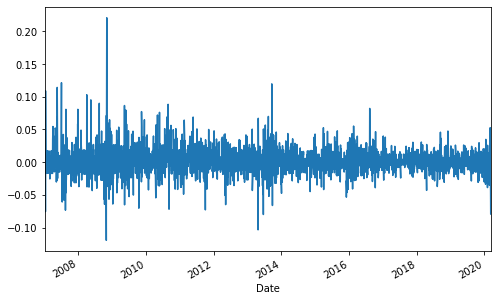

In [62]:
ST['daily_rate_return'].plot(figsize=(8,5))

In [63]:
# หาค่าเฉลี่ย #
avg_returns_d = ST['daily_rate_return'].mean()


# เอาค่าเฉลี่ยมาคูณ 250 วัน คือ จำนวนวันทั้งปี
avg_returns_y = avg_returns_d * 250

In [64]:
# Simple Rate Return ต่อ 1 ปี
print (str(round(avg_returns_y * 100, 5)) + ' %')

32.39449 %
